In [1]:
# %pip install matplotlib

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from ImportUtils import get_dfAll_from_Parquet
from ImportUtils import get_dfResultados_from_Parquet, get_dfResultAnalise_from_Parquet
from ImportUtils import vprint, vprint_time

from ChartUtils import chart
#from ChartUtils import linechart, barchart, barchart_nseries
#from main import dicParams, dicFiles


K_MATPLOTLIB_STYLES_FILE = "NOVAENES.mplstyle"


# Get Data

In [3]:
dfAll = get_dfAll_from_Parquet()
dfAllFase1 = dfAll[dfAll["Fase"]=="1"]
xList = list(dfAll.groupby('DescrExameAbrev').size().reset_index(name='count').sort_values('count', ascending=False).head(10)['DescrExameAbrev'])


# Charts, part 1

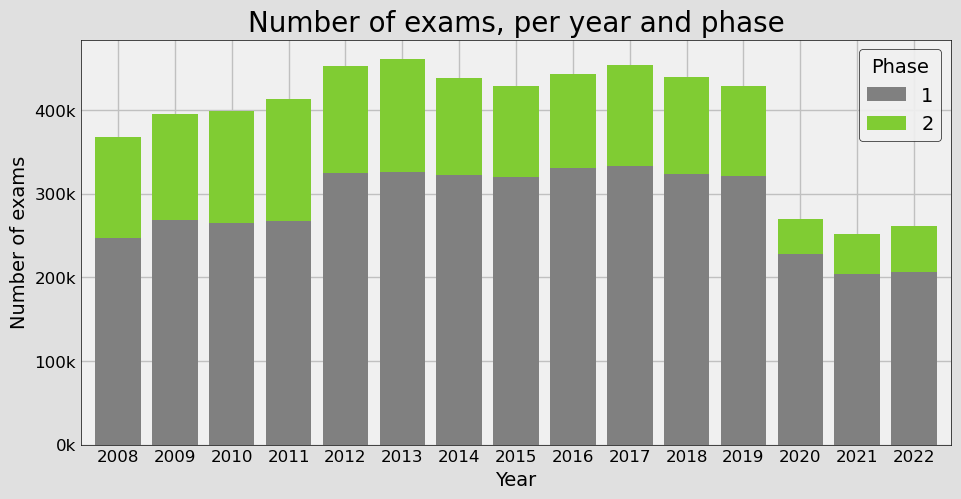

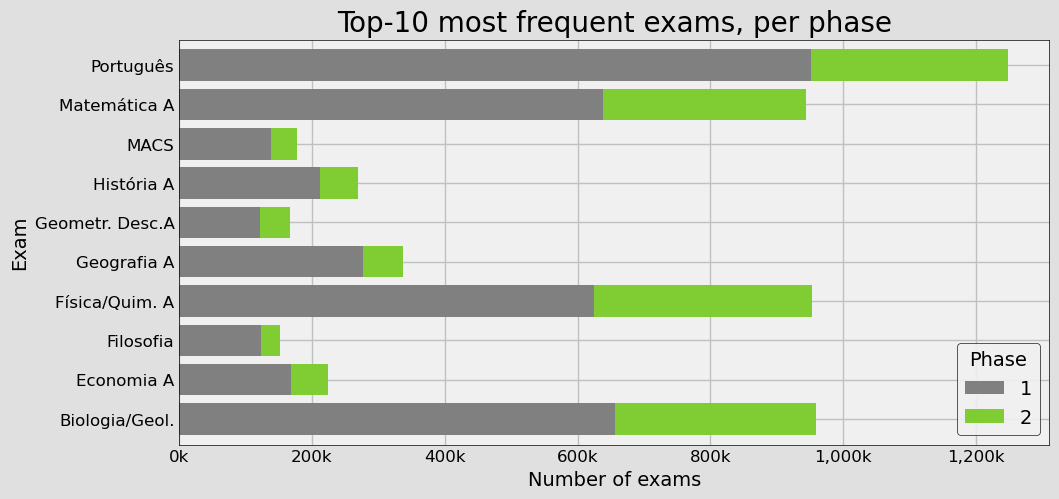

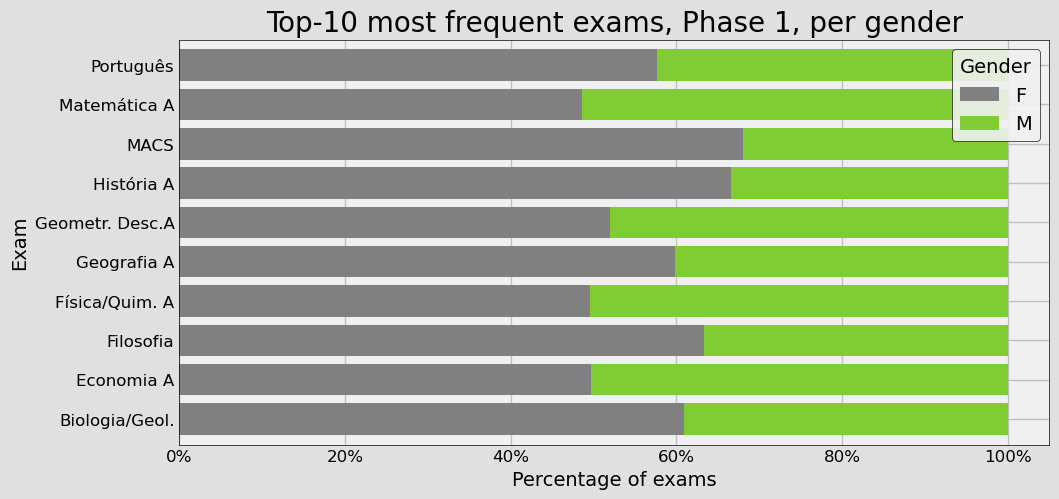

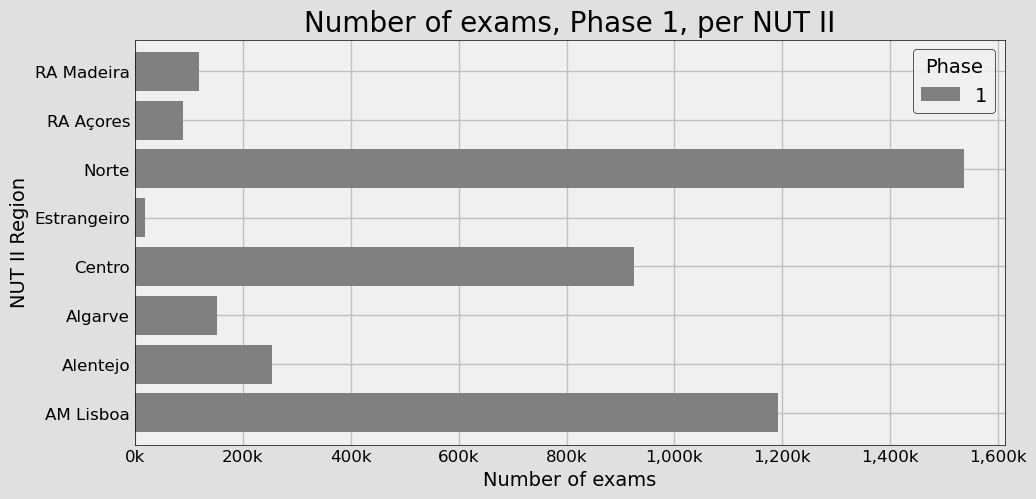

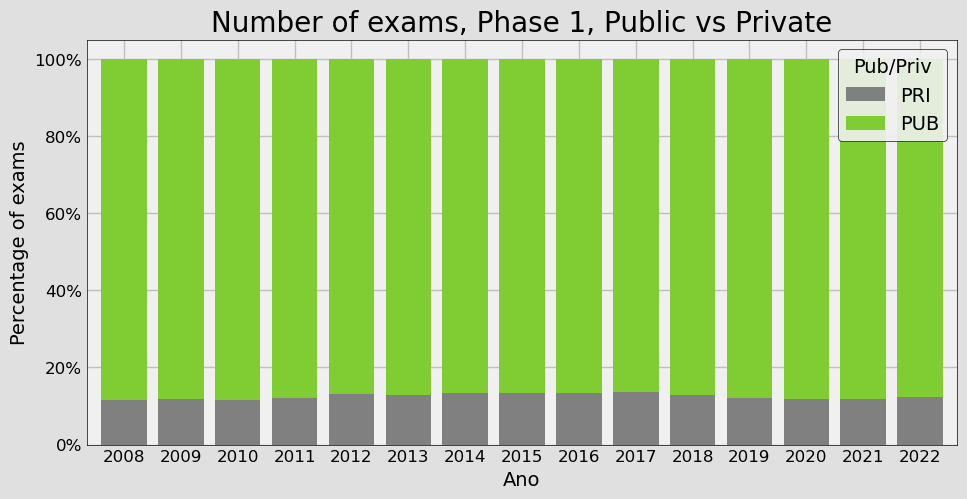

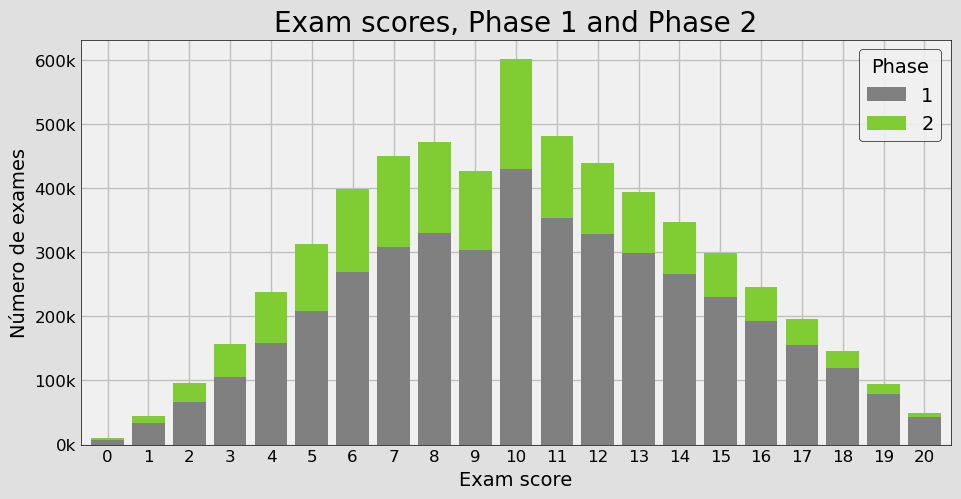

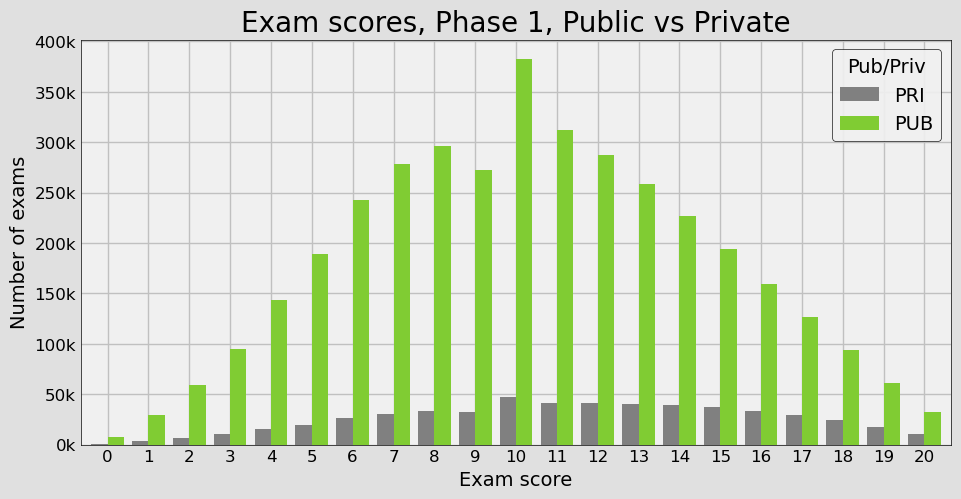

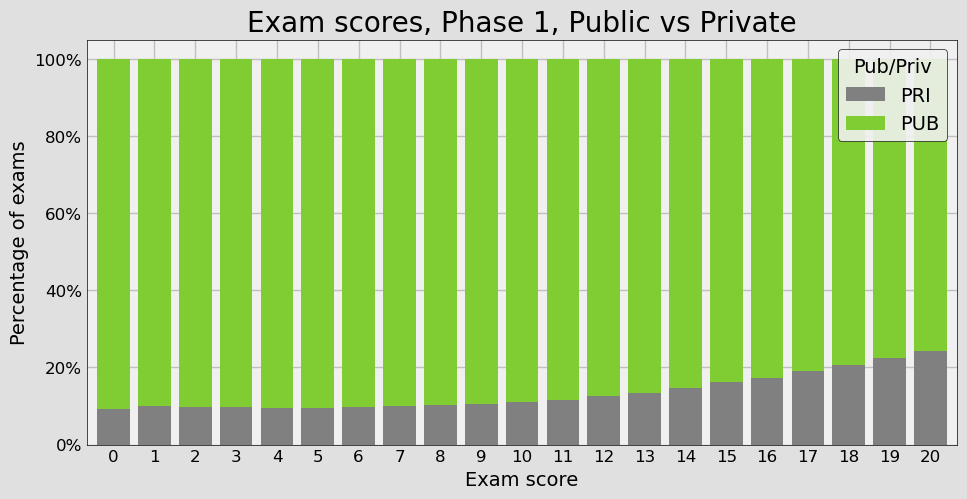

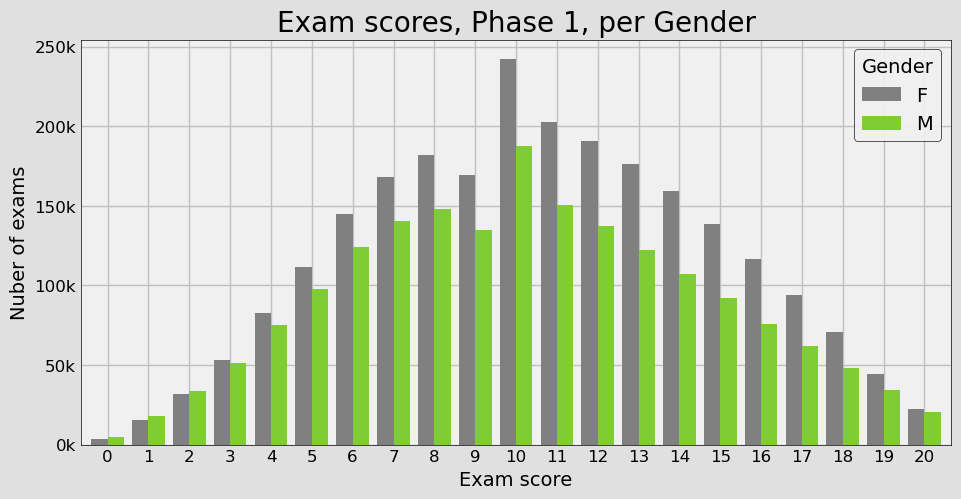

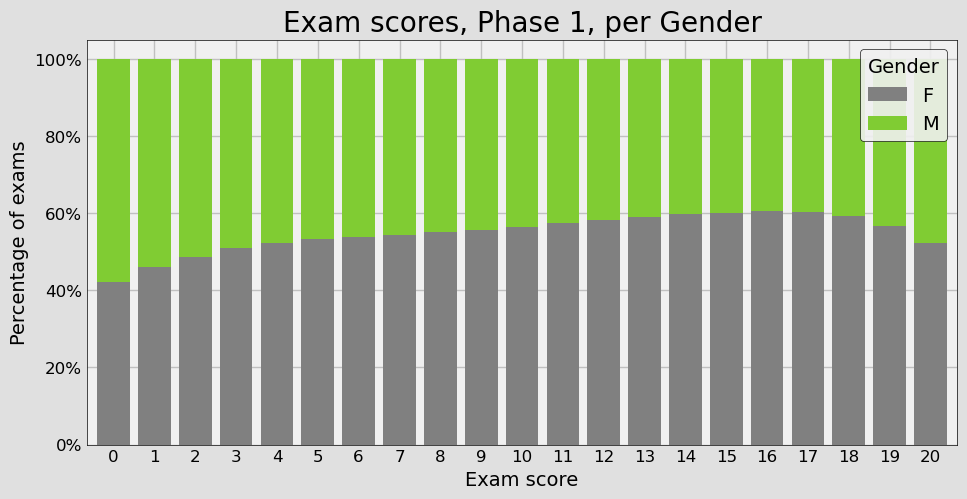

In [4]:
# Final plots

#1 Total exames, por ano e fase
title = "Number of exams, per year and phase"
chart(kind="bar", df=dfAll, xvar='ano', xlabel="Year", yvar=None, ylabel='Number of exams', zvar = "Fase", zlabel="Phase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')



#2 Top provas, fase 1+2
title = "Top-10 most frequent exams, per phase"
dfSubset = dfAll[dfAll['DescrExameAbrev'].isin(xList)]
chart(kind="barh", df=dfSubset, xvar='DescrExameAbrev', xlabel='Number of exams', yvar=None, ylabel='Exam', zvar = "Fase", zlabel="Phase", title=title, stacked=True, xAxisScale=1/1000, xAxisScaleSymbol='k')

#3 Top provas, fase 1, por sexo
title = "Top-10 most frequent exams, Phase 1, per gender"
dfSubset = dfAllFase1[dfAllFase1['DescrExameAbrev'].isin(xList)]
chart(kind="barh", df=dfSubset, xvar='DescrExameAbrev', xlabel="Percentage of exams", yvar=None, ylabel='Exam', zvar = "Sexo", zlabel="Gender", title=title, stacked=True, normalize=True, xAxisScale=100, xAxisScaleSymbol='%')

#4 Provas 1a fase, por região
title = "Number of exams, Phase 1, per NUT II"
chart(kind="barh", df=dfAllFase1, xvar='DescrNuts2', xlabel='Number of exams', yvar=None, ylabel='NUT II Region', zvar = "Fase", zlabel="Phase", title=title, xAxisScale=1/1000, xAxisScaleSymbol='k', legend=None)

#5 Provas 1a fase, por região
title = "Number of exams, Phase 1, Public vs Private"
chart(kind="bar", df=dfAllFase1, xvar='ano', xlabel="Ano", yvar=None, ylabel='Percentage of exams', zvar = "PubPriv", zlabel="Pub/Priv", title=title, stacked=True, normalize=True, yAxisScale=100, yAxisScaleSymbol='%')

#6 Resultados, 1a e 2a fase
title = "Exam scores, Phase 1 and Phase 2"
chart(kind="bar", df=dfAll, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Número de exames', zvar = "Fase", zlabel="Phase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')

#7 Resultados 1a fase, pub/priv
title = "Exam scores, Phase 1, Public vs Private"
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Number of exams', zvar = "PubPriv", zlabel="Pub/Priv", title=title, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Percentage of exams', zvar = "PubPriv", zlabel="Pub/Priv", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)

#8 Resultados 1a fase, por sexo
title = "Exam scores, Phase 1, per Gender"
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Nuber of exams', zvar = "Sexo", zlabel="Gender", title=title, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Percentage of exams', zvar = "Sexo", zlabel="Gender", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)



# Parte 2 - COVID

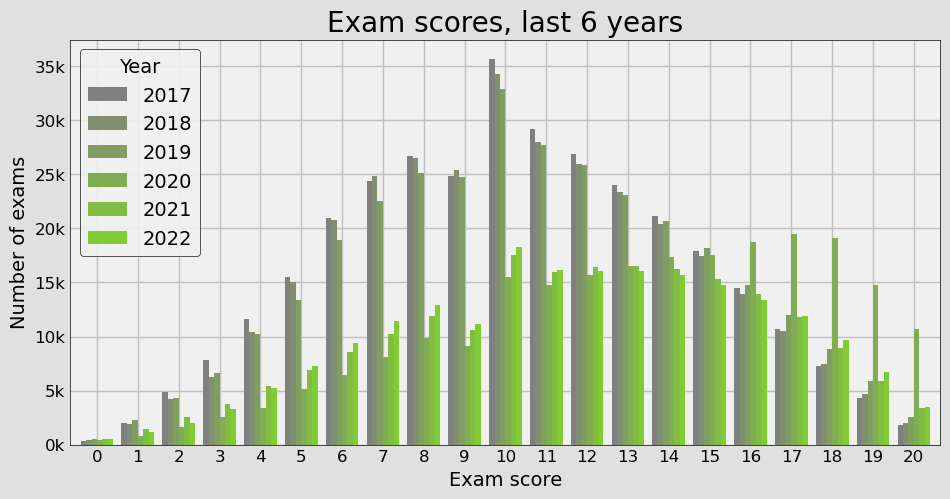

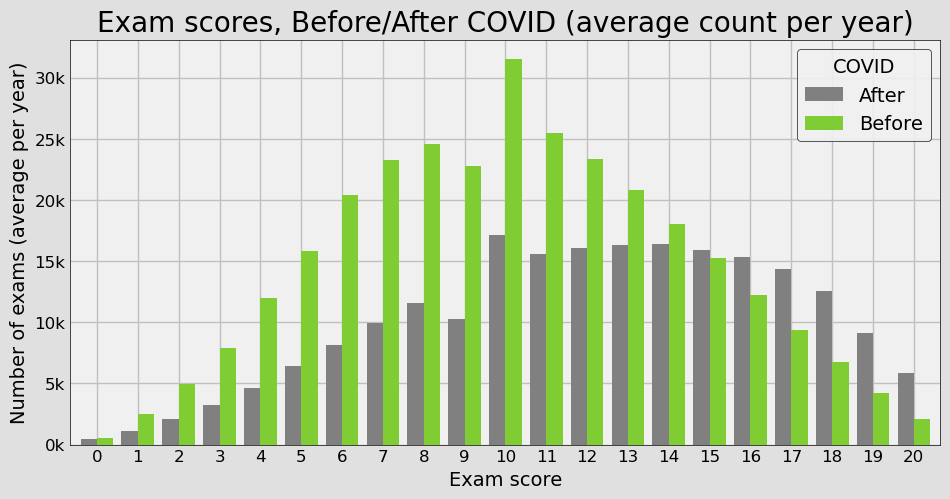

In [14]:
#6 Resultados, 1a e 2a fase
title = "Exam scores, last 6 years"
dfsubset = dfAllFase1[dfAllFase1["ano"]>=2017]
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Number of exams', zvar = "ano", zlabel="Year", title=title, stacked=False, normalize=False, yAxisScale=1/1000, yAxisScaleSymbol='k')


title = "Exam scores, Before/After COVID (average count per year)"

dfCountYears = dfAllFase1[["Covid", "ano"]].groupby('Covid').nunique("ano")
dfsubset = dfAllFase1.groupby(['Class_Exam_Rounded','Covid']).size().reset_index(name='count')
dfsubset = dfsubset.merge(dfCountYears, on='Covid', how='left')
dfsubset['count_per_year'] = dfsubset['count'] / dfsubset['ano']

chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar="count_per_year", ylabel='Number of exams (average per year)', zvar = "Covid", zlabel="COVID", title=title, stacked=False, normalize=False, yAxisScale=1/1000, yAxisScaleSymbol='k')


# PARTE 2

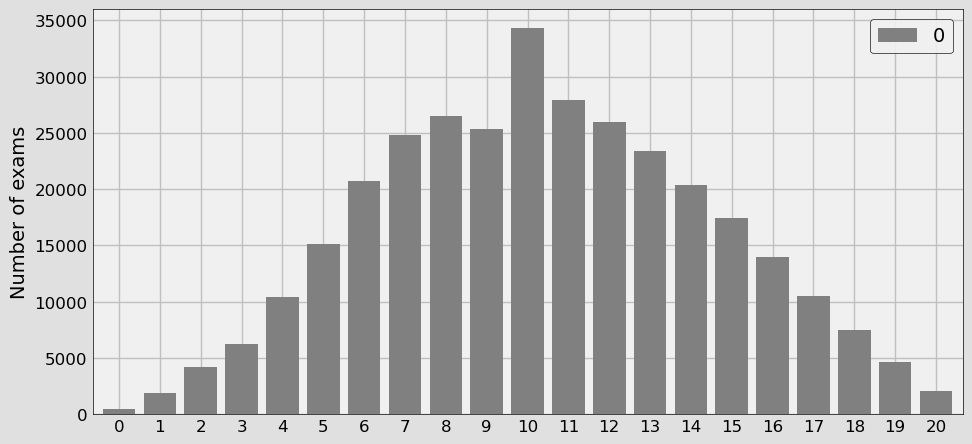

In [9]:


dfsubset = dfAllFase1[ dfAllFase1['ano'] == 2018]
Title = 
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', yvar=None, zlabel="", title=title)

dfsubset = dfAllFase1[ dfAllFase1['ano'] == 2019]
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', yvar=None)

dfsubset = dfAllFase1[ dfAllFase1['ano'] == 2020]
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', yvar=None)

dfsubset = dfAllFase1[ dfAllFase1['ano'] == 2021]
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', yvar=None)

dfsubset = dfAllFase1[ dfAllFase1['ano'] == 2022]
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', yvar=None)


In [ ]:

dfsubset = dfAllFase1[ dfAllFase1['ano'] < 2020]
chart("bar", dfsubset, 'Class_Exam_Rounded')

dfsubset = dfAllFase1[ dfAllFase1['ano'] == 2020]
chart("bar", dfsubset, 'Class_Exam_Rounded')

from ChartUtils import barchart_nseries

barchart_nseries(dfAll, xAxis='ano', dataSeries='Sexo', values='counts', stacked=False)


# Line Charts

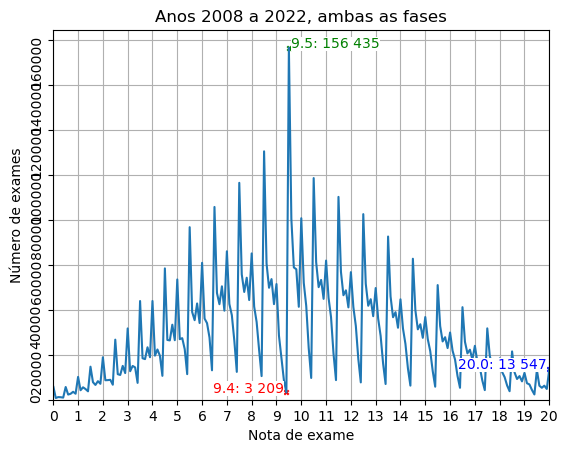

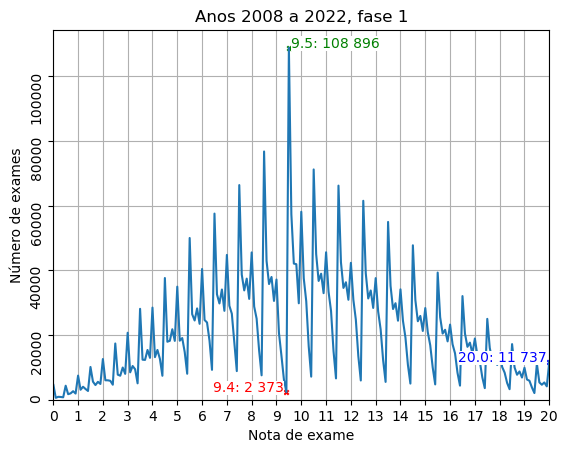

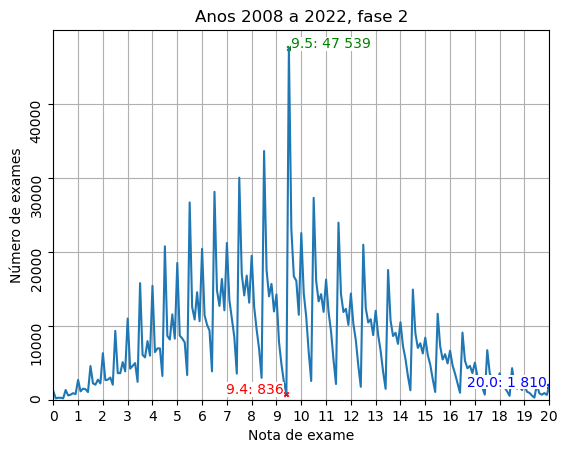

In [9]:

#linechart(dfAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart("line", dfAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnaliseAll = dfAll[dfAll['Fase'] == '1']

#linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart("line", dfAllFase1, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)))


dfsubset = dfAll[(dfAll['Fase'] == '2')]
#linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart("line", dfsubset, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


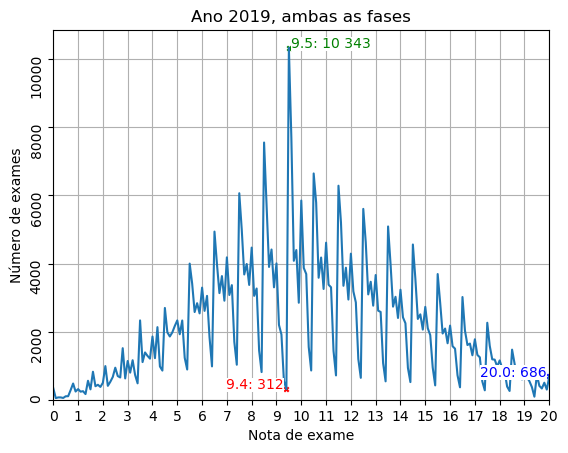

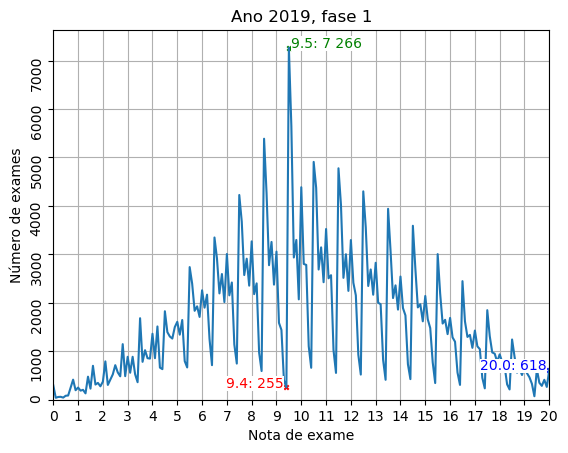

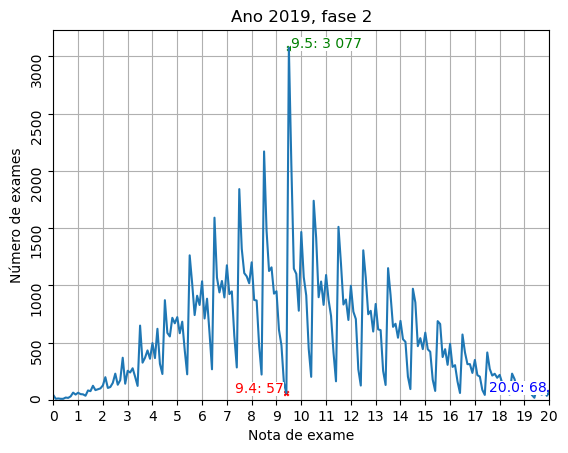

In [10]:

dfResultAnalise2019 = dfAll[(dfAll['ano'] == 2019)]
#linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart(kind="line", df= dfResultAnalise2019, xvar="Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

dfResultAnalise2019 = dfAll[(dfAll['ano'] == 2019) & (dfAll['Fase'] == '1')]
#linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart(kind="line", df=dfResultAnalise2019, xvar="Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

dfResultAnalise2019 = dfAll[(dfAll['ano'] == 2019) & (dfAll['Fase'] == '2')]
#linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart(kind="line", df=dfResultAnalise2019, xvar="Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


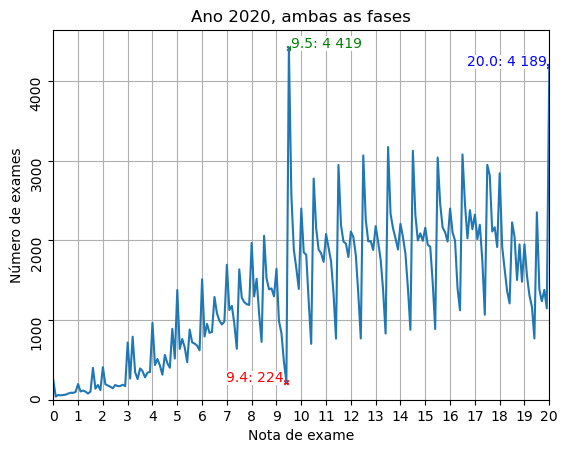

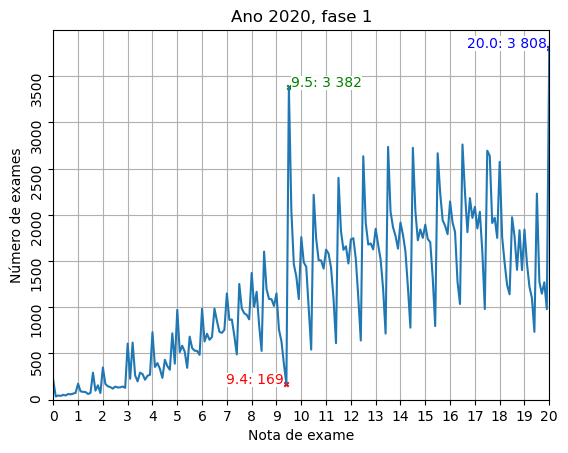

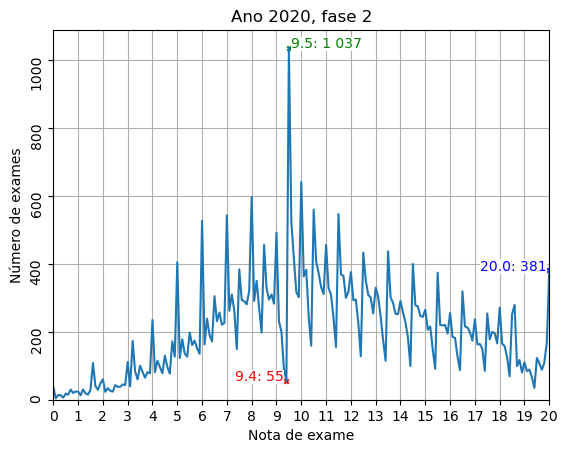

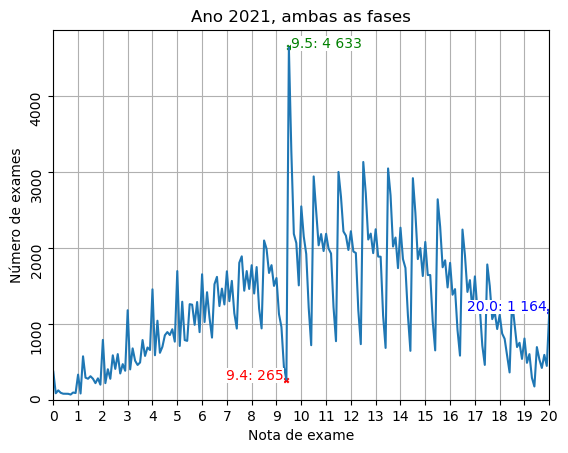

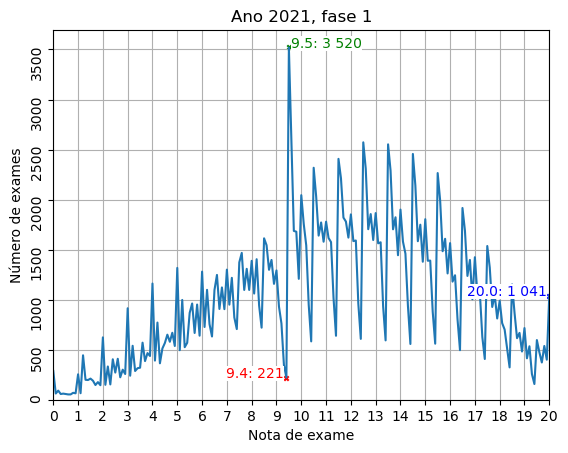

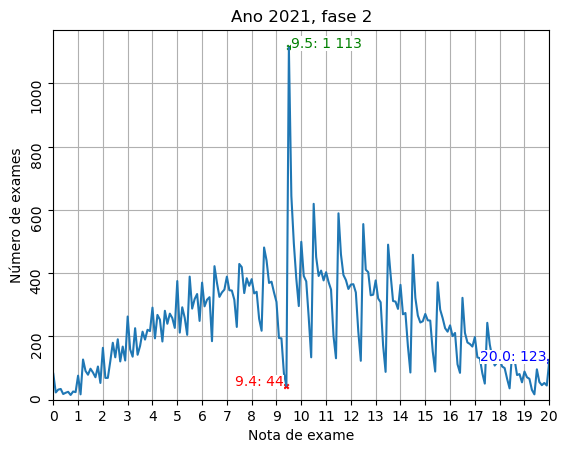

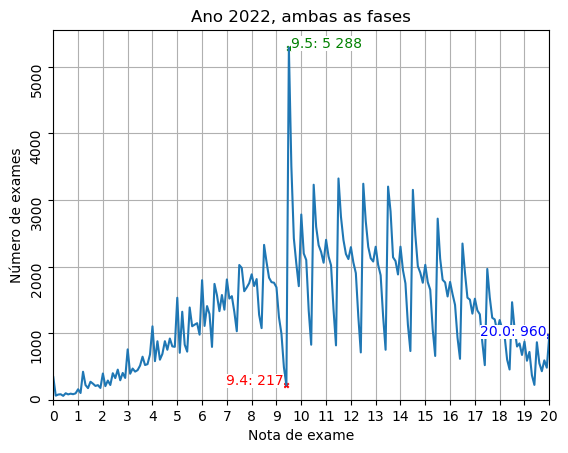

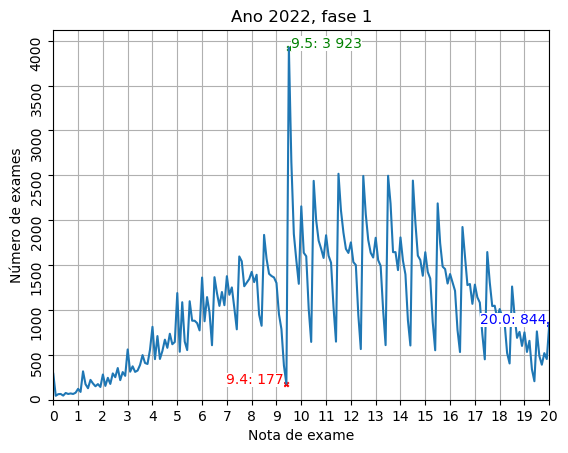

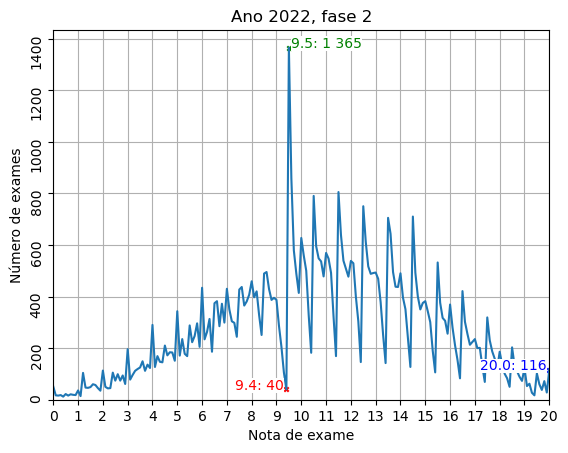

In [11]:

dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2020) ]
#linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart(kind="line", df=dfResultAnalise2020, xvar="Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2020) & (dfAll['Fase'] == '1')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2020) & (dfAll['Fase'] == '2')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2021) ]
#linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart(kind="line", df=dfResultAnalise2020, xvar= "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2021) & (dfAll['Fase'] == '1')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2021) & (dfAll['Fase'] == '2')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2022) ]
#linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
chart(kind="line", df=dfResultAnalise2020, xvar="Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2022) & (dfAll['Fase'] == '1')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2022) & (dfAll['Fase'] == '2')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


# Exames por Sexo, Pub/Priv e Fase

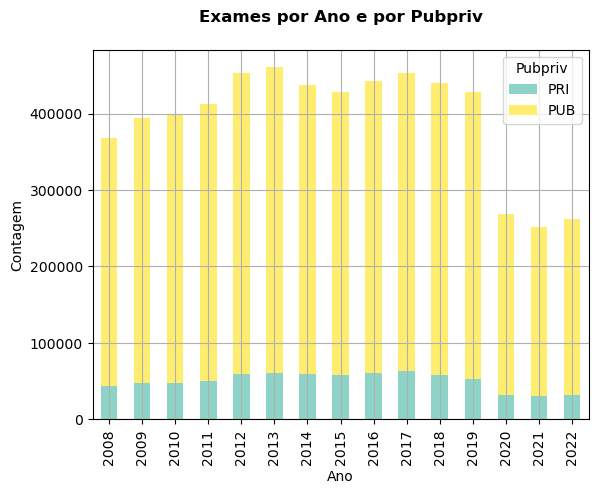

In [5]:
#dfExamesPorPubPriv = dfAll.groupby(['ano', 'PubPriv']).size().reset_index(name='counts')
barchart_nseries(dfAll, index='ano', columns='PubPriv', values='counts')


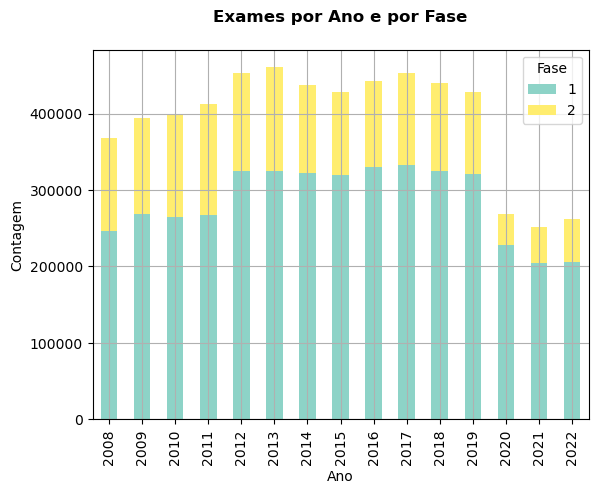

In [6]:

barchart_nseries(dfAll, index='ano', columns='Fase', values='count',  title=None, xlabel='Ano', ylabel=None, grid=True, stacked=False, colormap='Set3')



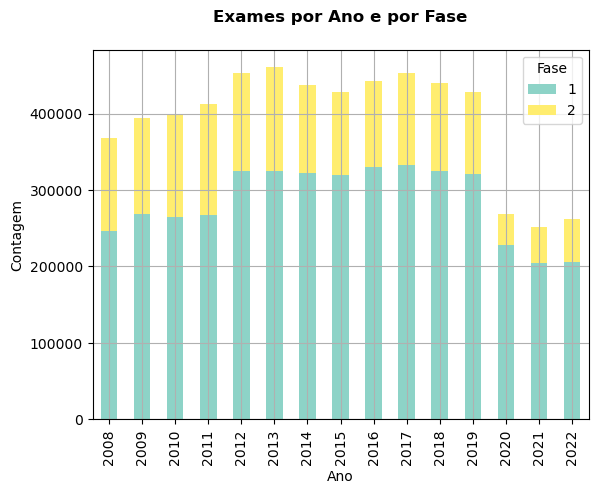

In [7]:
barchart_nseries(dfAll, index='ano', columns='Fase', values='counts')


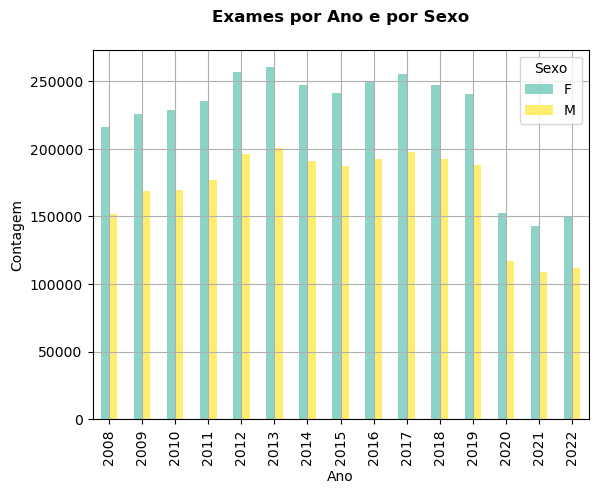

In [7]:
barchart_nseries(dfAll, xAxis='ano', dataSeries='Sexo', values='counts', stacked=False)


In [ ]:
barchart_nseries(dfAll, xAxis='ano', dataSeries='Sexo', values='counts', stacked=False)


In [8]:
dfAll

,ano,ID,Escola,Fase,Exame,ParaAprov,Interno,ParaMelhoria,ParaIngresso,ParaCFCEPE,...,PubPriv,CodDGEEC,Descr,DescrDistrito,DescrConcelho,Nuts3,DescrNuts3,DescrExame,TipoExame,Class_Exam_Rounded
0,2022,1,0002,1,639,N,N,S,S,N,...,PUB,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,Português,N,5
1,2022,2,0002,1,639,N,N,N,S,N,...,PUB,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,Português,N,12
2,2022,3,0002,1,639,N,N,N,S,N,...,PUB,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,Português,N,9
3,2022,4,0002,1,639,N,N,N,S,N,...,PUB,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,Português,N,4
4,2022,5,0002,1,639,N,N,N,S,N,...,PUB,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,Português,N,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901323,2020,108193,0665,1,848,N,N,N,S,N,...,PUB,1503057,None,Setúbal,Almada,170,Área Metropolitana de Lisboa,Mandarim (iniciação),N,20
5901324,2020,155992,0861,1,848,N,N,N,S,N,...,PUB,1010623,None,Leiria,Marinha Grande,16F,Região de Leiria,Mandarim (iniciação),N,17
5901325,2020,155993,0861,1,848,N,N,N,S,N,...,PUB,1010623,None,Leiria,Marinha Grande,16F,Região de Leiria,Mandarim (iniciação),N,16
5901326,2020,155994,0861,1,848,N,N,N,S,N,...,PUB,1010623,None,Leiria,Marinha Grande,16F,Região de Leiria,Mandarim (iniciação),N,13


In [ ]:
current_time = None
dfResultados    = get_dfResultados_from_Parquet()
vprint("dfResultados.shape: ", dfResultados.shape)
current_time = vprint_time(current_time, 'Loaded dfResultados from Parquet...')
#vprint("dfResultados.shape: ", dfResultados.shape)
#current_time = vprint_time(current_time, 'Loaded dfResultados from Parquet...')


dfResultAnalise = get_dfResultAnalise_from_Parquet()
vprint("dfResultAnalise.shape: ", dfResultAnalise.shape)
current_time = vprint_time(current_time, 'Loaded dfResultAnalise from Parquet...')



dfExamesPorAno = dfResultados.groupby(['ano', 'Fase']).size().reset_index(name='counts')
# PUBPRIV dfExamesPorSexo = dfResultados.groupby(['ano', 'Sexo']).size().reset_index(name='counts')
dfExamesPorSexo = dfResultados.groupby(['ano', 'Sexo']).size().reset_index(name='counts')
#print(dfExamesPorAno.head(10))
#print(dfResultados.head(10))

#barchart_nseries(dfExamesPorAno, index='ano', columns='Fase', values='counts')
#barchart_nseries(dfResultados, index='ano', columns='Fase', values='counts')
#barchart_nseries(dfResultados, index='ano', columns='Sexo', values='counts')
# barchart_nseries(dfResultados, index='ano', columns='Fase', values='count',  title=None, xlabel='Ano', ylabel=None, grid=True, stacked=False, colormap='Set3')

#barchart(dfExamesPorAno, "ano", "counts", "Fase", "Número de exames", "Ano", "Distribuição de exames por ano e fase", True)

dfAll = get_dfAll_from_Parquet()
vprint("dfAll.shape: ", dfAll.shape)
current_time = vprint_time(current_time, 'Loaded dfAll from Parquet...')

dfExamesPorPubPriv = dfAll.groupby(['ano', 'PubPriv']).size().reset_index(name='counts')
#barchart_nseries(dfExamesPorPubPriv, index='ano', columns='PubPriv', values='counts')
barchart_nseries(dfAll, index='ano', columns='PubPriv', values='counts')
print("done")

# region Create charts comparing All Years, 2019 and 2020
# dfResultAnalise = dfResultados
# dfResultAnaliseAll = dfResultAnalise
# linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnaliseAll = dfResultAnalise[(dfResultAnalise['Fase'] == '1')]
# linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnaliseAll = dfResultAnalise[(dfResultAnalise['Fase'] == '2')]
# linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

# dfResultAnalise2019 = dfResultAnalise[(dfResultAnalise['ano'] == 2019)]
# linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2019 = dfResultAnalise[(dfResultAnalise['ano'] == 2019) & (dfResultAnalise['Fase'] == '1')]
# linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2019 = dfResultAnalise[(dfResultAnalise['ano'] == 2019) & (dfResultAnalise['Fase'] == '2')]
# linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

# dfResultAnalise2020 = dfResultAnalise[(dfResultAnalise['ano'] == 2020) ]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfResultAnalise[(dfResultAnalise['ano'] == 2020) & (dfResultAnalise['Fase'] == '1')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfResultAnalise[(dfResultAnalise['ano'] == 2020) & (dfResultAnalise['Fase'] == '2')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

# endregion



# Create bar chart with a series for each value of Fase
#dfResultados.groupby(['ano', 'Fase']).size().unstack().plot(kind='bar', stacked=True)

#dfResultados.groupby(['ano', 'Fase']).size().unstack().plot(kind='bar', stacked=False)
#dfResultados.groupby(['ano', 'Fase']).size().unstack().plot(kind='bar', stacked=False)
#plt.show()


#linechart(dfResultAnalise)






In [20]:
from ChartUtils import linechart, barchart, barchart_nseries


NameError: name 'df' is not defined

# FUNDOS


dfAll = get_dfAll_from_Parquet()
dfAllFase1 = dfAll[dfAll['Fase'] == 1]

#8 Resultados 1a fase, por sexo
title = "Resultados, Fase 1, por Sexo"

chart(kind="line", df=dfAllFase1, xvar='Class_Exam', xlabel="Classificação obtida", yvar=None, ylabel='Número de exames', title=title, yAxisScale=1/1000, yAxisScaleSymbol='k', xlimit=(0,20), zvar = "Sexo", xticks=np.arange(0, 20, 1))
#chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "Sexo", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)



chart( kind='bar', df=dfAll[:700000], xvar='ano', yvar=None, ylabel='Número de exames', zvar = None)
chart( kind='bar', df=dfAll[:7000000], xvar='ano', yvar=None, ylabel='Número de exames', zvar = 'Fase')
chart( kind='bar', df=dfAll, xvar='Distrito', yvar=None, zvar="PubPriv", ylabel='Número de exames', stacked=True, normalize=True)


chart( kind='line', df=dfAll, xvar='ano', xlimit=(2008,2022), yvar=None, ylabel='Número de exames', zvar = None)
chart( kind='line', df=dfAll, xvar='ano', xlimit=(2008,2022),yvar=None,  ylabel='Número de exames', zvar = 'Fase')
chart( kind='line', df=dfAll, xvar='ano', xlimit=(2008,2022), yvar=None, ylabel='Número de exames', zvar = 'Fase', stacked=True)
chart( kind='line', df=dfAll, xvar='Distrito', zvar="PubPriv",yvar=None,  ylabel='Número de exames', stacked=True, normalize=True)
chart( kind='line', df=dfAll, xvar='Distrito',  zvar="Fase", yvar=None, ylabel='Número de exames', stacked=True, normalize=True)
chart( kind='line', df=dfAll, xvar='ano', xlimit=(2008,2022), yvar=None, zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)




chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="line",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="bar",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="barh",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="hist",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="box",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="area",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)



#chart(kind="pie",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
#chart(kind="scatter",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="hexbin",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='DescrNuts2', ylabel='Número de exames', zvar = None)



chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase')
chart(kind="line",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase')

chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase', stacked=True)

chart_line( dfAll, xvar='Distrito', yvar='count', zvar="PubPriv", ylabel='Número de exames', stacked=True, normalize=True)

chart_line( dfAll, xvar='Distrito', yvar='count', zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)

chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)



